red neuronal con variables transformadas y usando solo meses, después intento con quincenas

In [93]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, recall_score

In [94]:
# Path to the dataset.
filepath = "./data/data_globant_cnn_2.csv"

# Read the data
dataset = pd.read_csv(filepath)

In [95]:
dataset.head()

,Date,Position,Seniority,Location,Studio,Client Tag,Project Tag,Team Name,Month,Day,EmployeeID,Engagement_D
0,02Jan23,Software Developer,0,CO/ANT/MED,Engineering,GWI001,ATLINT,Breaking Badger,1,2,66,Alto
1,03Jan23,Software Developer,0,CO/ANT/MED,Engineering,GWI001,ATLINT,Breaking Badger,1,3,66,Medio
2,04Jan23,Software Developer,0,CO/ANT/MED,Engineering,GWI001,ATLINT,Breaking Badger,1,4,66,Medio
3,05Jan23,Software Developer,0,CO/ANT/MED,Engineering,GWI001,ATLINT,Breaking Badger,1,5,66,Medio
4,06Jan23,Software Developer,0,CO/ANT/MED,Engineering,GWI001,ATLINT,Breaking Badger,1,6,66,Alto


In [96]:
# Función para asignar bloques de 15 días por persona
def assign_15day_blocks(group):
    group = group.sort_values("Date").reset_index(drop=True)
    
    # Crear el número de bloque: cada 15 filas cambia el valor
    group["15_dias"] = (group.index // 15) + 1
    
    return group

# Aplicar por persona
dataset = dataset.groupby("EmployeeID").apply(assign_15day_blocks).reset_index(drop=True)

C:\Users\suane\AppData\Local\Temp\ipykernel_20588\2465336916.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataset = dataset.groupby("EmployeeID").apply(assign_15day_blocks).reset_index(drop=True)


In [97]:
dataset=dataset.drop(columns=["Date"])

In [98]:
dataset.head()

,Position,Seniority,Location,Studio,Client Tag,Project Tag,Team Name,Month,Day,EmployeeID,Engagement_D,15_dias
0,Data Analyst,1,AR/CABA/BA,Data,EDUSYS,CATPRO,Star Wars: The Furry Awakens,2,1,0,Alto,1
1,Data Analyst,1,AR/CABA/BA,Data,EDUSYS,CATPRO,Star Wars: The Furry Awakens,6,1,0,Medio,1
2,Data Analyst,1,AR/CABA/BA,Data,EDUSYS,CATPRO,Star Wars: The Furry Awakens,3,1,0,Medio,1
3,Data Analyst,1,AR/CABA/BA,Data,EDUSYS,CATPRO,Star Wars: The Furry Awakens,2,2,0,Alto,1
4,Data Analyst,1,AR/CABA/BA,Data,EDUSYS,CATPRO,Star Wars: The Furry Awakens,1,2,0,Alto,1


In [99]:
categorical_cols = [
    "Position",
    "Location",
    "Studio",
    "Client Tag",
    "Project Tag",
    "Team Name" ]
dataset = pd.get_dummies(dataset, columns=categorical_cols, drop_first=False)

print("Columnas después del OneHot:", len(dataset.columns))

dataset.head()

Columnas después del OneHot: 57


,Seniority,Month,Day,EmployeeID,Engagement_D,15_dias,Position_Business Analyst,Position_Business Intelligence,Position_Cybersecurity Specialist,Position_Data Analyst,...,Team Name_Breaking Badger,Team Name_Fight Club Penguin,Team Name_Finding Nemo's Friends,Team Name_Game of Tones,Team Name_Jurassic Bark,Team Name_Paws and Recreation,Team Name_Star Wars: The Furry Awakens,Team Name_The Great Catsby,Team Name_The Lion Kingpin,Team Name_The Matrix Mice
0,1,2,1,0,Alto,1,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,1,6,1,0,Medio,1,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,1,3,1,0,Medio,1,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,1,2,2,0,Alto,1,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,1,1,2,0,Alto,1,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [100]:
# Shuffle the dataset
from sklearn.utils import shuffle

seed = 1234 #set seed for reproducibility

np.random.seed(seed)

dataset = shuffle(dataset)

In [101]:
mapping = {
    "Bajo": 1,
    "Medio": 2,
    "Alto": 3
}

dataset["Engagement_D_num"] = dataset["Engagement_D"].map(mapping)

In [102]:
features = dataset.drop(['Engagement_D', 'Engagement_D_num'], axis=1)

labels = dataset['Engagement_D_num']

In [103]:
features.shape

(11366, 56)

In [104]:
features = features.values.astype(float)

In [105]:
labels_int = labels.values

In [106]:
labels = tf.keras.utils.to_categorical(labels_int, num_classes=5)


In [107]:
print(labels[0])
print(labels_int[0])

[0. 0. 0. 1. 0.]
3


In [108]:
labels[0:10,:]

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [109]:
# Split into train and test sets.

from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels,
                                                                            test_size = 0.30, random_state = 1234)

In [110]:
# Normalize features between 0 and 1
# Normalization parameters are learned just from the training data to avoid information injection.
from sklearn import preprocessing

normalizer = preprocessing.MinMaxScaler().fit(train_features)

train_normalized = normalizer.transform(train_features)

test_normalized = normalizer.transform(test_features)

In [111]:
# Define the model.
model = keras.Sequential([
    keras.layers.Dense(units = 16, input_shape=(59,), activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    keras.layers.Dense(units = 8, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    keras.layers.Dense(units = 2, activation=tf.nn.softmax)
])

c:\Users\suane\anaconda3\envs\mv-tec\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
tf.keras.utils.plot_model(model, show_shapes=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [113]:
print(train_normalized.shape)


(7956, 56)


In [128]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(56,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_normalized,
    train_labels,
    epochs=300,
    validation_split=0.2,
    batch_size=16,
    verbose=1
)


Epoch 1/300
398/398 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4954 - loss: 1.0497 - val_accuracy: 0.5747 - val_loss: 0.8870
Epoch 2/300
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5380 - loss: 0.9021 - val_accuracy: 0.5911 - val_loss: 0.8555
Epoch 3/300
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5773 - loss: 0.8653 - val_accuracy: 0.5867 - val_loss: 0.8352
Epoch 4/300
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5860 - loss: 0.8507 - val_accuracy: 0.6407 - val_loss: 0.8205
Epoch 5/300
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6083 - loss: 0.8328 - val_accuracy: 0.6413 - val_loss: 0.8043
Epoch 6/300
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6094 - loss: 0.8284 - val_accuracy: 0.6426 - val_loss: 0.7937
Epoch 7/300
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6125 - loss: 0.8150 - val_accuracy: 0.6520 - val_loss: 0.7816
Epoch 8/300
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6260 - loss: 0.8070 - val_accu

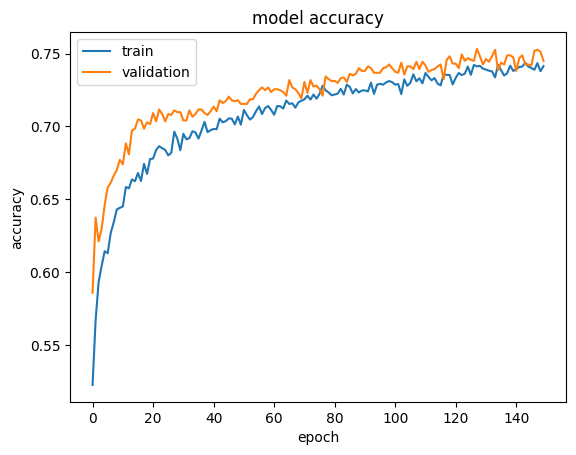

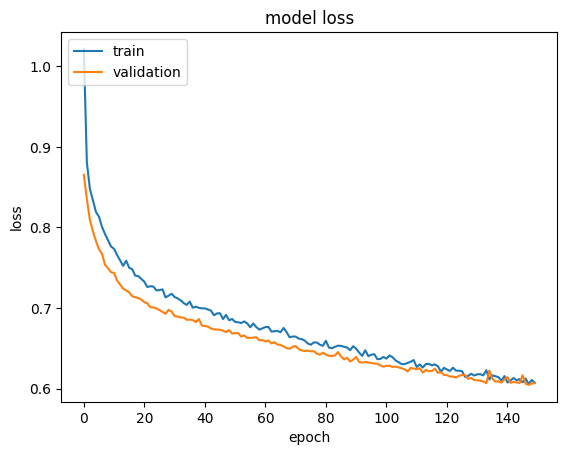

In [119]:
# Plot accuracy and loss curves

import matplotlib.pyplot as plt
%matplotlib inline
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [120]:
# Evaluate the model on the test set and print the loss and accuracy.
model.evaluate(test_normalized, test_labels) # [loss, accuracy]

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7551 - loss: 0.5969


[0.5968573093414307, 0.7551319599151611]

In [121]:
# Make predictions on the test set.
predictions = model.predict(test_normalized)

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [122]:
# Print the first 5 predictions.
predictions[0:5]

array([[3.1746808e-04, 7.0384644e-02, 5.1830286e-01, 4.1072133e-01,
        2.7370406e-04],
       [1.6734923e-06, 6.3828365e-03, 9.9190980e-01, 1.7048018e-03,
        9.0003573e-07],
       [5.4260669e-05, 6.3832231e-02, 6.4351082e-02, 8.7171620e-01,
        4.6193993e-05],
       [6.7375062e-05, 7.7600591e-02, 9.0325797e-01, 1.9018205e-02,
        5.5868724e-05],
       [1.2775898e-04, 5.5800617e-02, 2.7568150e-01, 6.6826844e-01,
        1.2167177e-04]], dtype=float32)

In [123]:
# Get the column index with max probability from predictions.
predictions_int = np.argmax(predictions, axis=1)

# Ground truth
true_values_int = np.argmax(test_labels, axis=1)

In [124]:
pd.crosstab(true_values_int, predictions_int, rownames=['True labels'], colnames=['Predicted labels'])

Predicted labels,2,3
True labels,,
1,83,104
2,967,484
3,164,1608


In [125]:
accuracy_score(true_values_int, predictions_int)

0.7551319648093842

In [126]:
recall_score(true_values_int, predictions_int, average=None)

array([0.        , 0.66643694, 0.90744921])